In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import time
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
from collections import OrderedDict

In [3]:
# List of consumer goods companies: Asian Paints, Britannia, Emami, Hindustan Unilever, ITC Ltd, Jubilant Food, Nestle India, Titan
consumer_goods = ['ASIANPAINT__EQ__NSE__NSE__MINUTE.csv','BRITANNIA__EQ__NSE__NSE__MINUTE.csv','EMAMILTD__EQ__NSE__NSE__MINUTE.csv', 'HINDUNILVR__EQ__NSE__NSE__MINUTE.csv','ITC__EQ__NSE__NSE__MINUTE.csv','JUBILANT__EQ__NSE__NSE__MINUTE.csv','JUBLFOOD__EQ__NSE__NSE__MINUTE.csv','NESTLEIND__EQ__NSE__NSE__MINUTE.csv','TITAN__EQ__NSE__NSE__MINUTE.csv']

In [4]:
# Function to change the time-freq of the data into an hour-wise, day-wise, month-wise etc data 
def change_df(df, freq='1d'):
    data = df.set_index(pd.DatetimeIndex(df['timestamp']))
    data = data.resample(freq).agg(
        OrderedDict([
            ('open', 'first'),
            ('high', 'max'),
            ('low', 'min'),
            ('close', 'last'),
            ('volume', 'sum'),
        ])
    )
    return data

### Candlestick Plots

In [5]:
# Plot a candlestick graph for a given dataframe and given frequency
def plot_candlestick(df,freq='1d'):
    new_data = change_df(df,freq)
    fig = go.Figure(data=[go.Candlestick(x=new_data.index,
                    open=new_data['open'],
                    high=new_data['high'],
                    low=new_data['low'],
                    close=new_data['close'])])
    fig.show()

In [6]:
# Plot candlesticks for a given dataframe,for a day, week, month, and quarter time-frequencies
def plot_all_candlesticks(df):
    time_periods=['1D','1W','1M','1Q']
    for i in range(len(time_periods)):
        print("Time period: ",time_periods[i])
        plot_candlestick(df,time_periods[i])

In [8]:
# Asian Paints
plot_all_candlesticks(pd.read_csv(consumer_goods[0]))

Time period:  1D


Time period:  1W


Time period:  1M


Time period:  1Q


 Asian paints : steady rise from 2017 to 2020 with peak at 2020 Jan 

In [9]:
# Britannia
plot_all_candlesticks(pd.read_csv(consumer_goods[1]))

Time period:  1D


Time period:  1W


Time period:  1M


Time period:  1Q


 Britannia: considerable rise from july 2017 to july 2018 , sudden dip in first quarter of 2020

In [10]:
# HINDUNILVR
plot_all_candlesticks(pd.read_csv(consumer_goods[3]))

Time period:  1D


Time period:  1W


Time period:  1M


Time period:  1Q


Hidustan Unilever: steady and gradual rise from 2017 to 2020 

In [71]:
# ITC
plot_all_candlesticks(pd.read_csv(consumer_goods[4]))

Time period:  1D


Time period:  1W


Time period:  1M


Time period:  1Q


 ITC: relatively steady from 2017 to 2020 followed by sudden dip in 2020 first quarter 

### Trend Analysis based on price

 plots ratio of given closing price with the initial price of data over past three years 

In [79]:
# Trend Analysis
# The 'x' increase in price w.r.t the initial date's price
def plot_all_with_freq(freq='1d'):
    dfs = []
    columns = []
    # Iterating over 5 of the consumer goods companies
    for i in [0,1,2,3,4,5]:
        dfs.append(change_df(pd.read_csv(consumer_goods[i]), freq)['close'].dropna())
        columns.append(consumer_goods[i].split('_')[0])
    concat_df = pd.concat(dfs, axis=1)
    concat_df.columns = columns
    for i in range(1,len(concat_df)):
        # The below line divides the given price with the initial price of data, to give an idea of change from that date
        concat_df.iloc[i] = concat_df.iloc[i] / concat_df.iloc[0]
    plt.figure()
    concat_df[1:].plot(figsize=(10,10))

<Figure size 432x288 with 0 Axes>

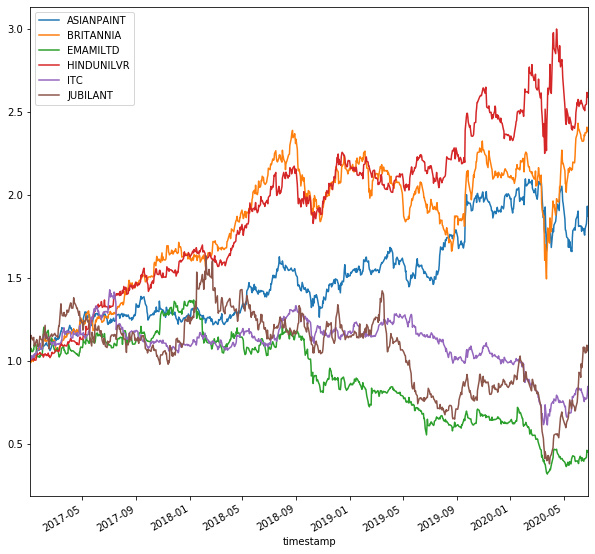

In [80]:
plot_all_with_freq('1D')

<Figure size 432x288 with 0 Axes>

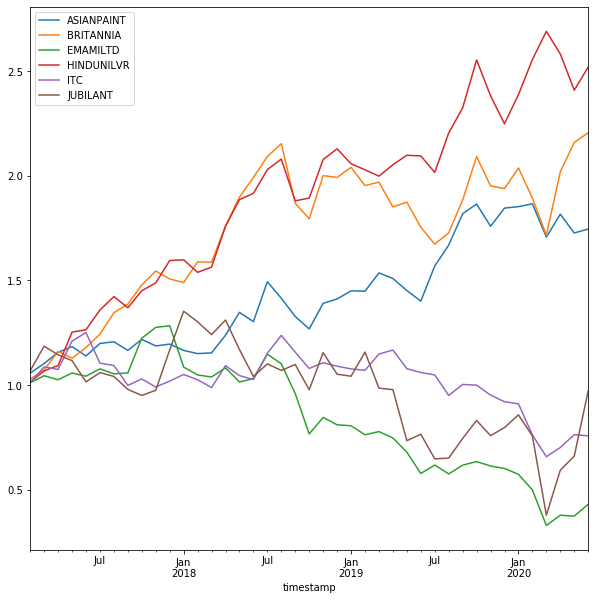

In [81]:
plot_all_with_freq('1M')

<Figure size 432x288 with 0 Axes>

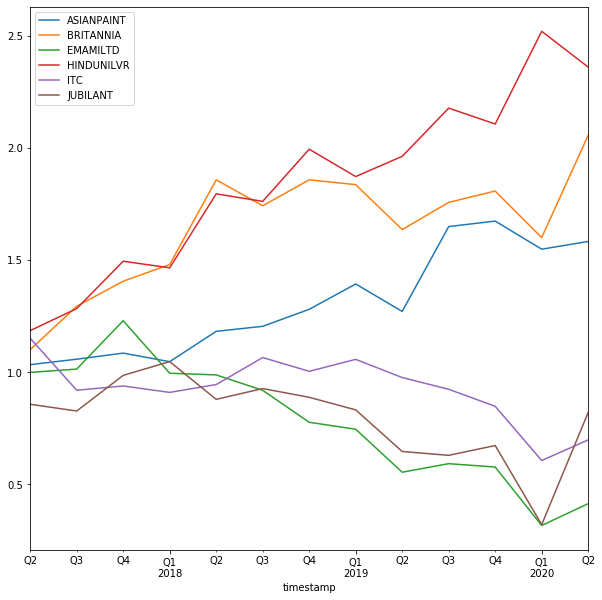

In [82]:
plot_all_with_freq('1Q')

## Moving Average with price and volume

When the shorter-term MA crosses above the longer-term MA, 
it's a buy signal, as it indicates that the trend is shifting up. This is known as a "golden cross."

Meanwhile, when the shorter-term MA crosses below the longer-term MA, 
it's a sell signal, as it indicates that the trend is shifting down. This is known as a "dead/death cross." 

A rising moving average indicates that the security is in an uptrend, 
while a declining moving average indicates that it is in a downtrend. 

Similarly, upward momentum is confirmed with a bullish crossover, 
which occurs when a short-term moving average crosses above a longer-term moving average. 

Conversely, downward momentum is confirmed with a bearish crossover, 
which occurs when a short-term moving average crosses below a longer-term moving average. 

In [91]:
# The function plots moving average for the given dataframe and chosen column name, 
# It plots MA for all the moving average values provided in the freq array
# brand name has been provided just to print the name while plotting. 
def plot_moving_average(brand_name, df, column='close', freq=[20]):
    new_df = change_df(df,'1d').dropna()
    dfs=[]
    columns=[]
    dfs.append(new_df[column])
    columns.append(column)
    for i in freq:
        dfs.append(new_df.rolling(window=i,min_periods=1).mean()[column])
        columns.append('MA_'+str(i)+'_'+column)
    new_df = pd.concat(dfs,axis=1)
    new_df.columns = columns
    plt.figure()
    new_df.plot(figsize=(15,15))
    plt.title(brand_name)

Statistical indicator Moving average is taken up next , here moving average over 20,50 and 200 days are computed and plotted 


/Users/pranav/anaconda3/envs/djangoenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/Users/pranav/anaconda3/envs/djangoenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

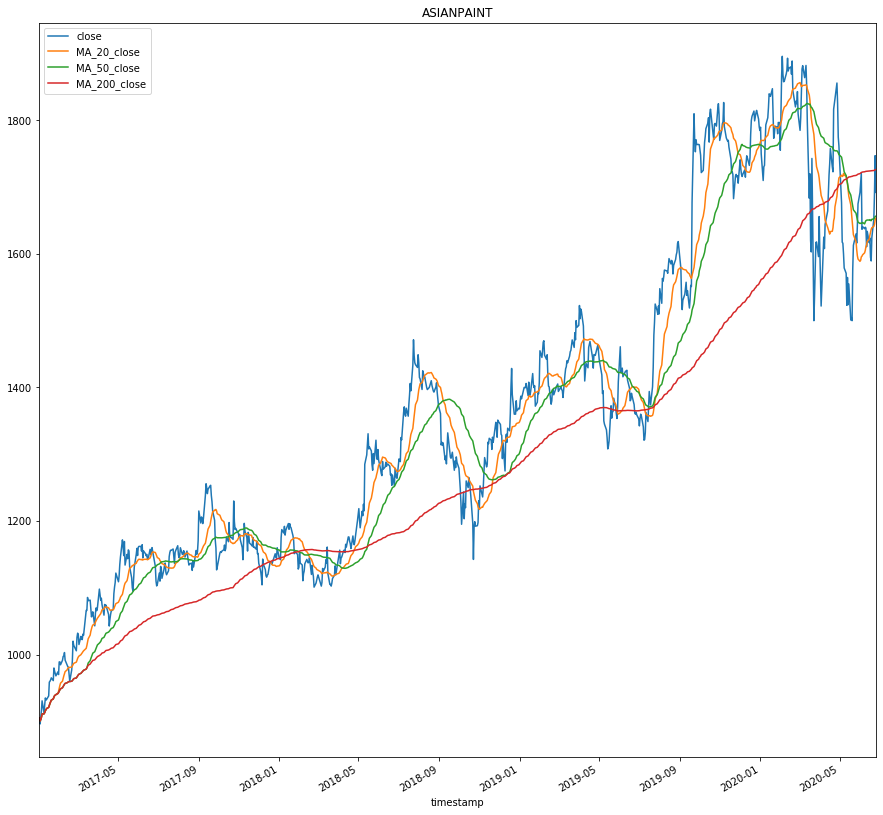

<Figure size 432x288 with 0 Axes>

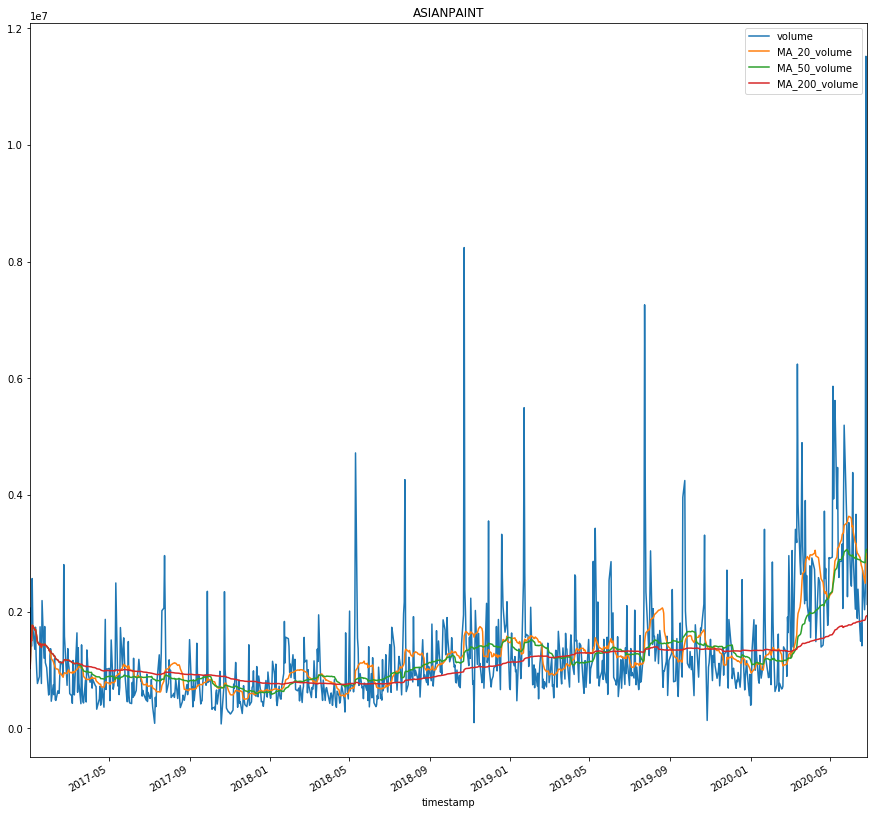

<Figure size 432x288 with 0 Axes>

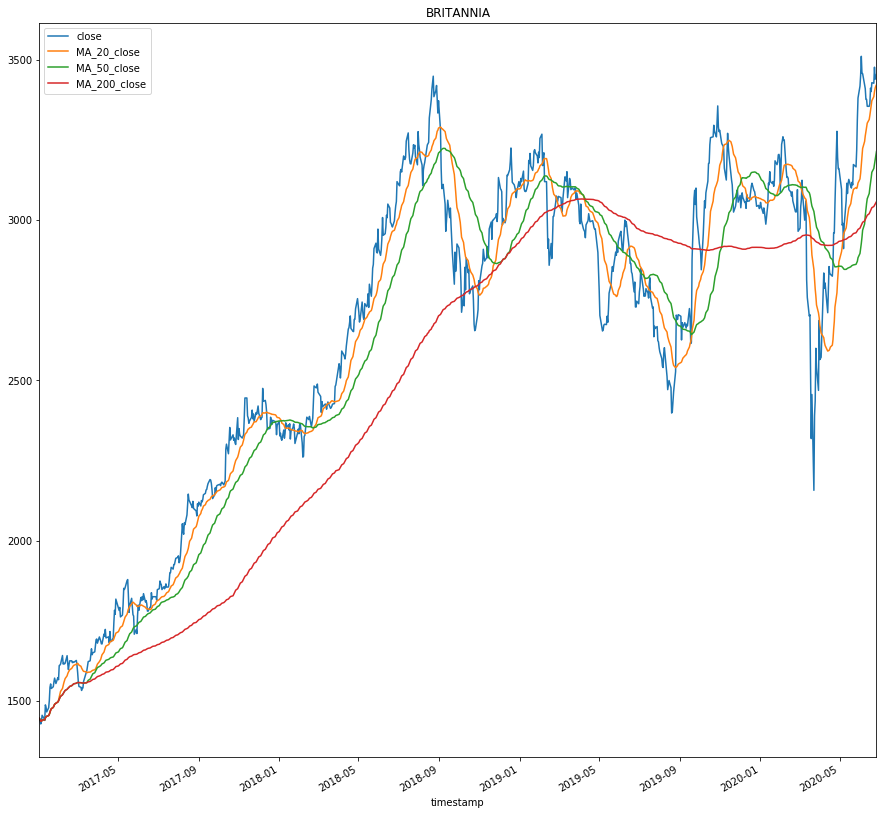

<Figure size 432x288 with 0 Axes>

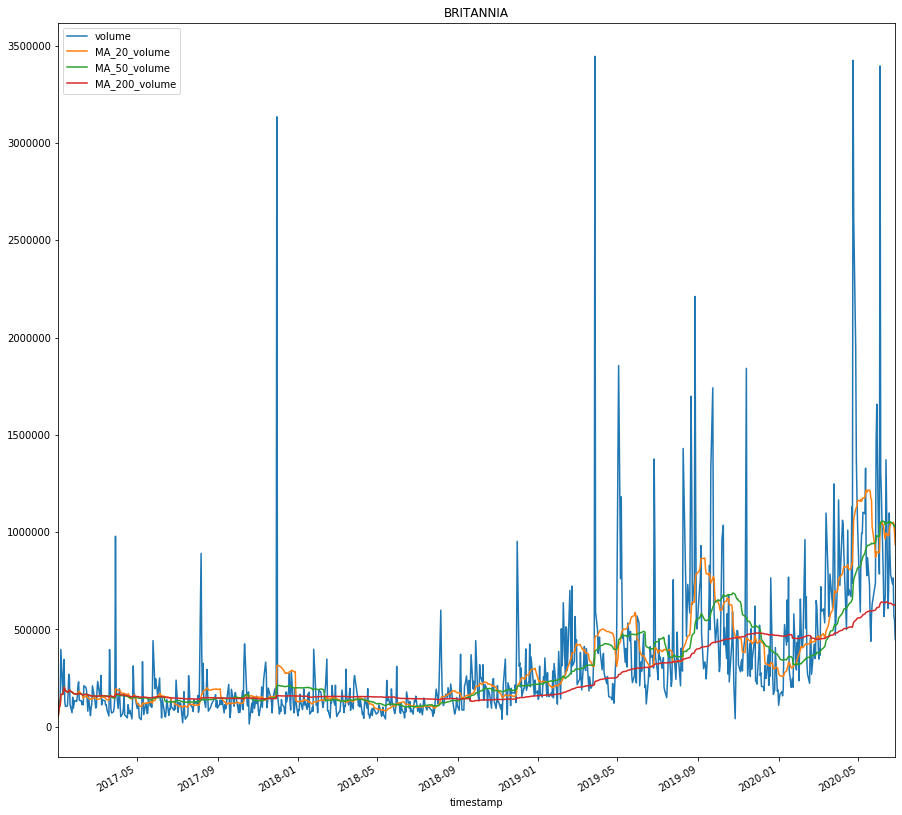

<Figure size 432x288 with 0 Axes>

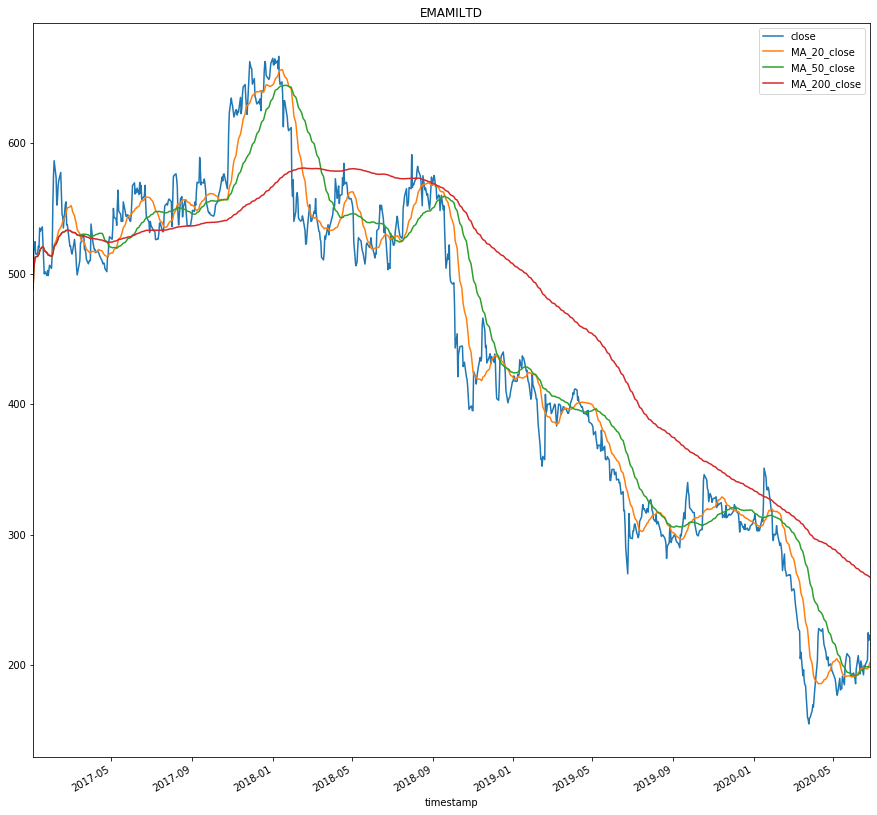

<Figure size 432x288 with 0 Axes>

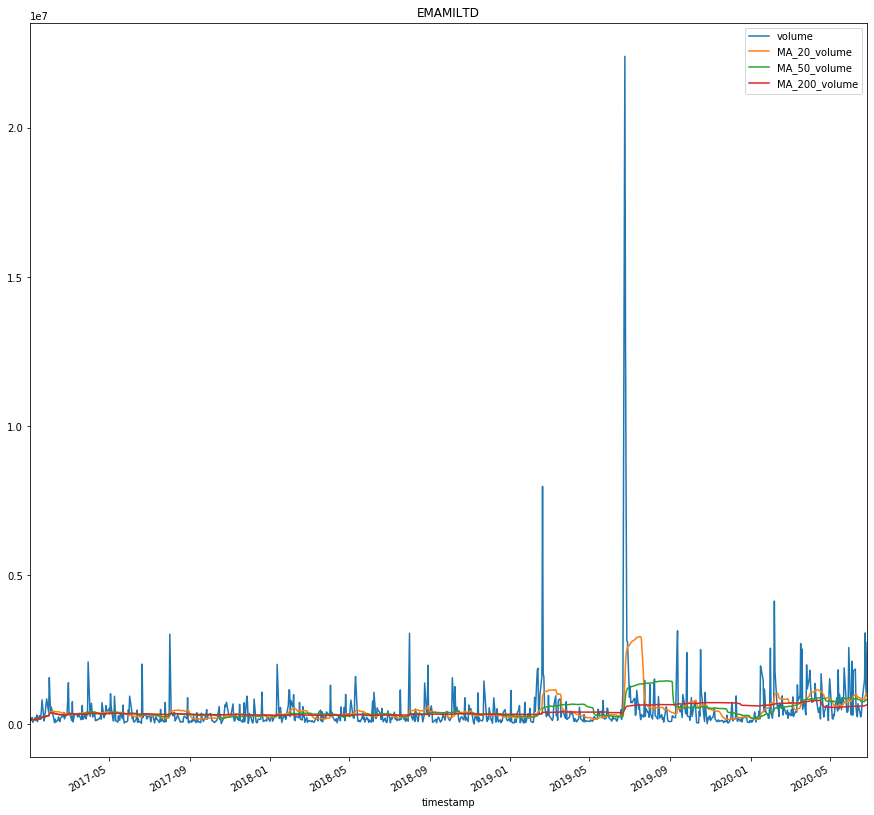

<Figure size 432x288 with 0 Axes>

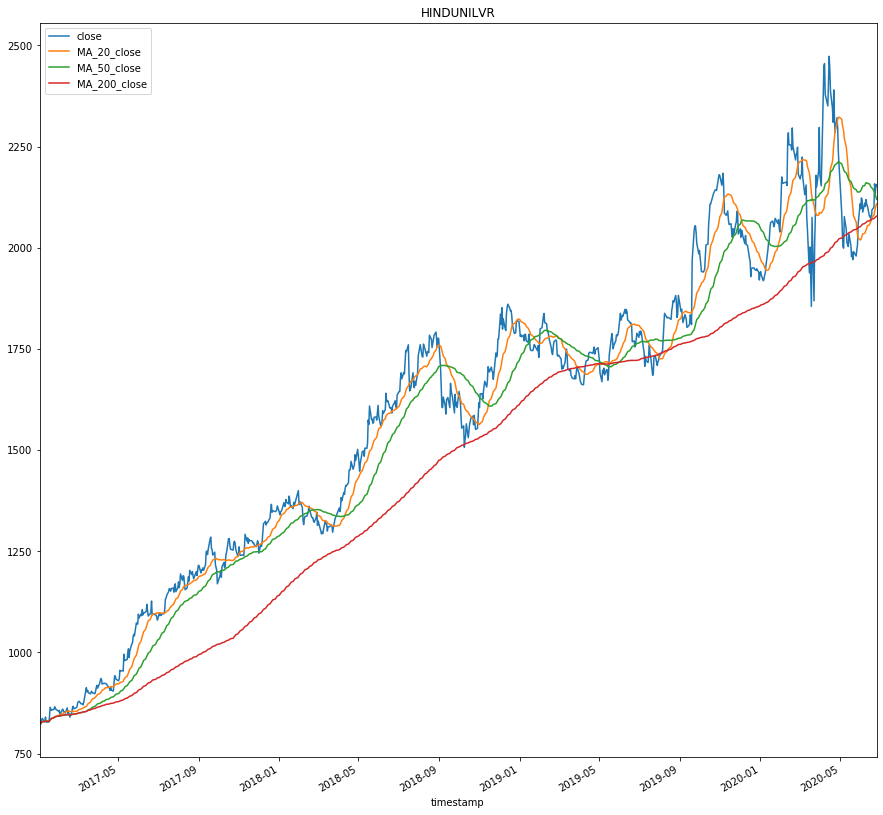

<Figure size 432x288 with 0 Axes>

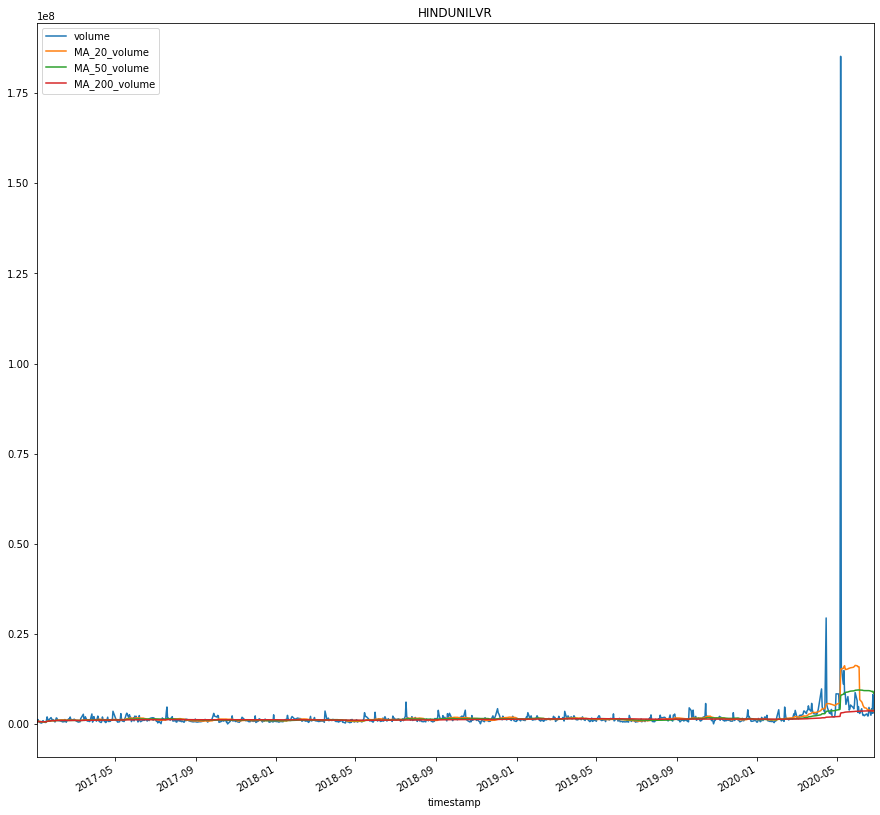

<Figure size 432x288 with 0 Axes>

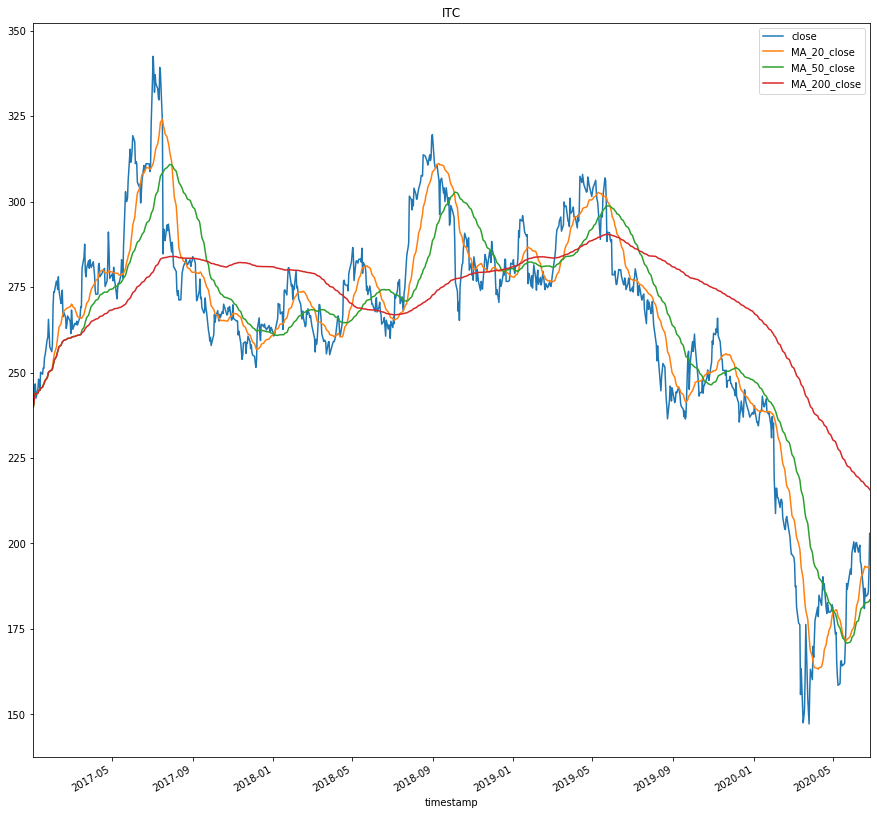

<Figure size 432x288 with 0 Axes>

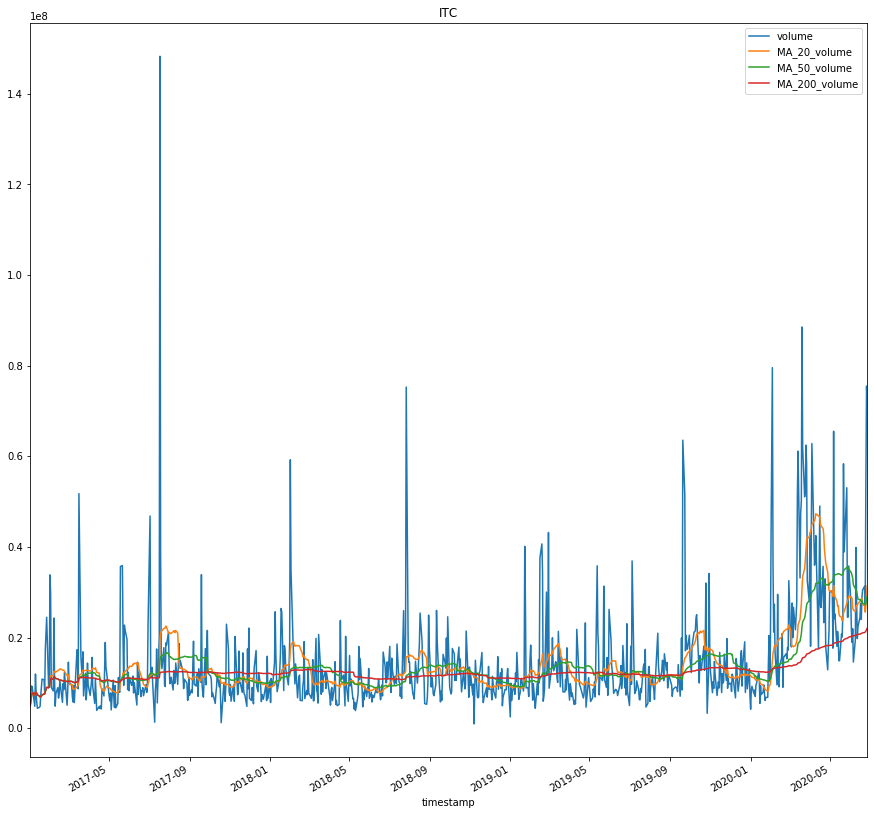

<Figure size 432x288 with 0 Axes>

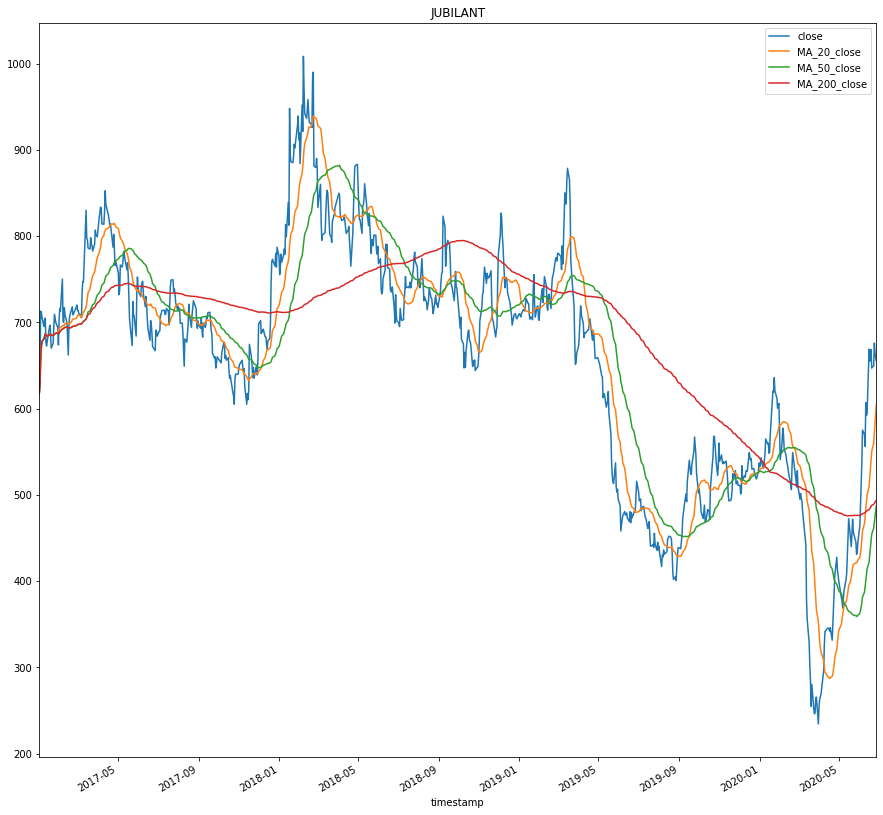

<Figure size 432x288 with 0 Axes>

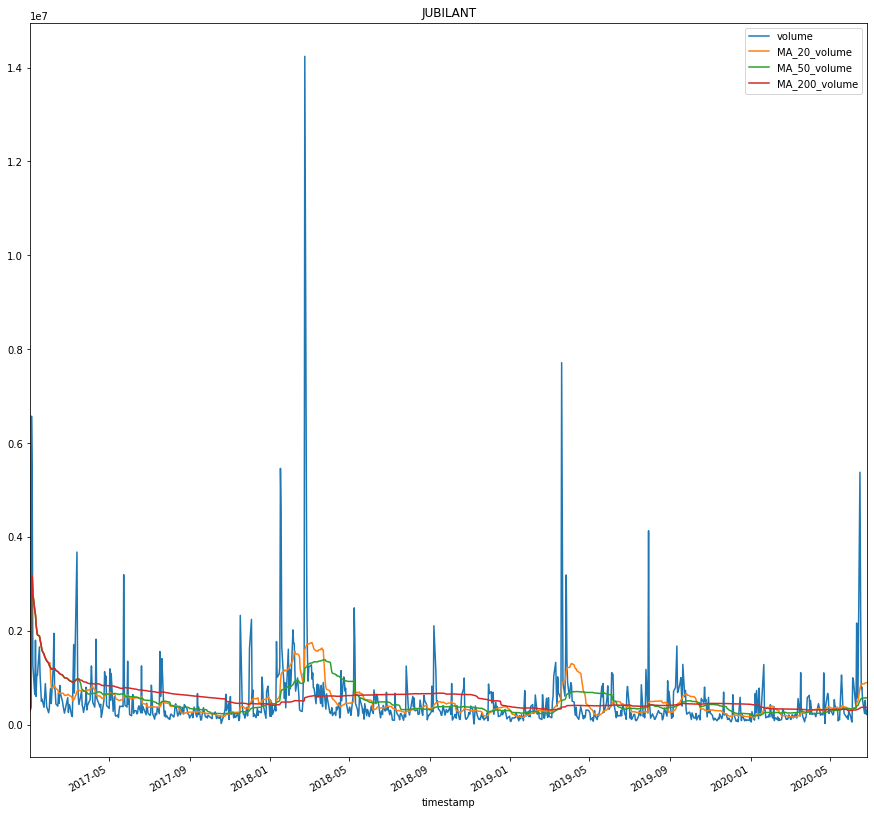

<Figure size 432x288 with 0 Axes>

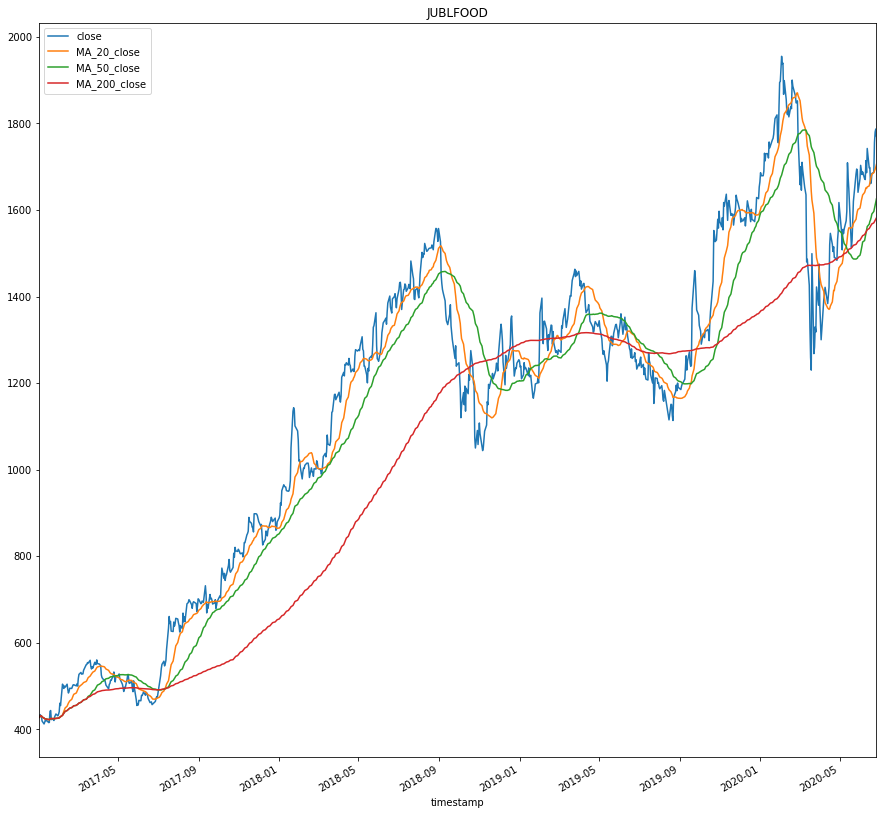

<Figure size 432x288 with 0 Axes>

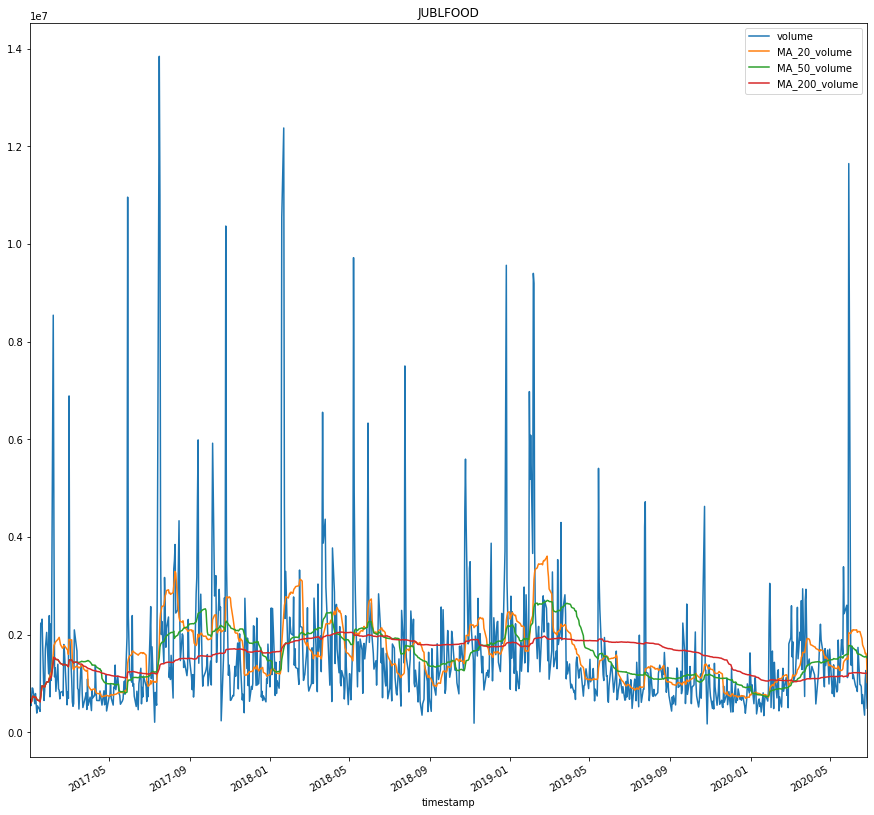

<Figure size 432x288 with 0 Axes>

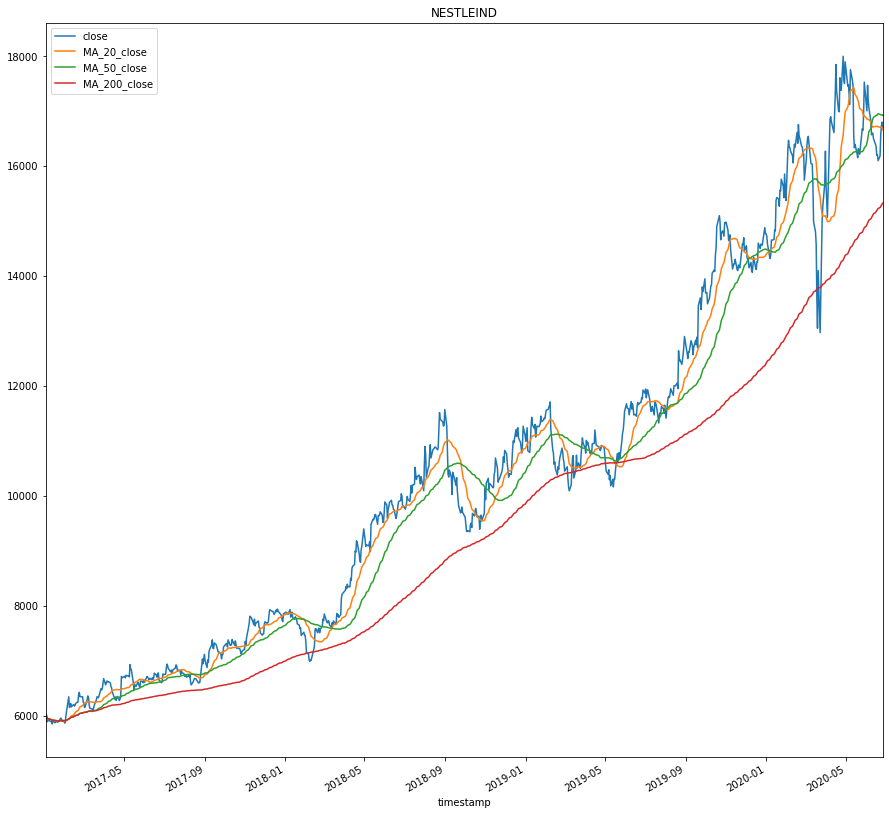

<Figure size 432x288 with 0 Axes>

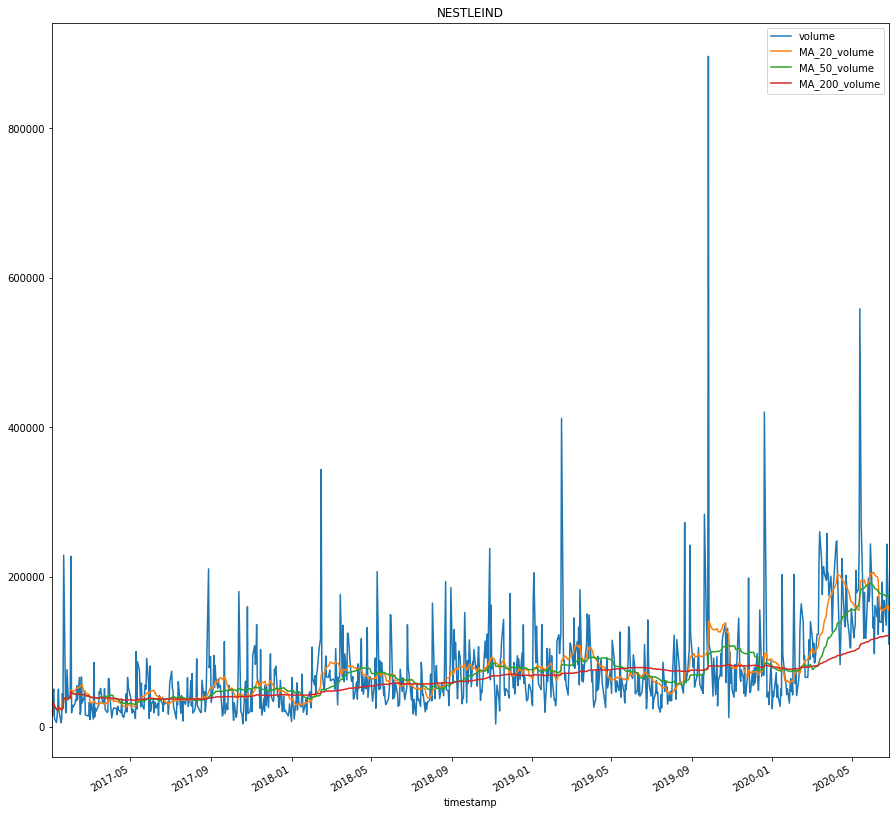

<Figure size 432x288 with 0 Axes>

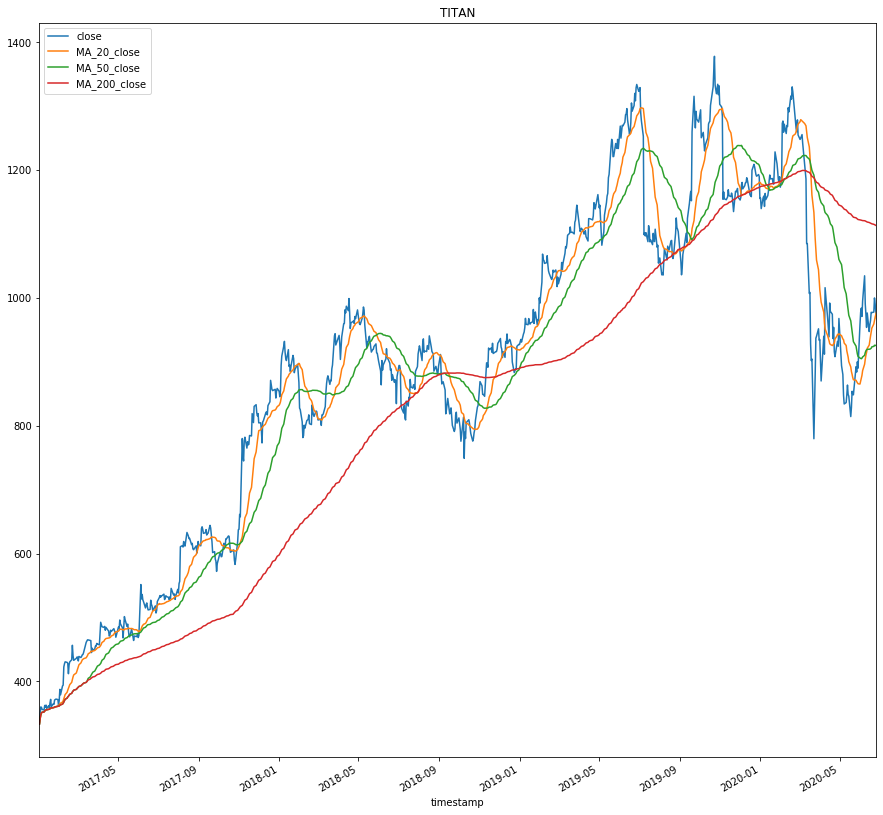

<Figure size 432x288 with 0 Axes>

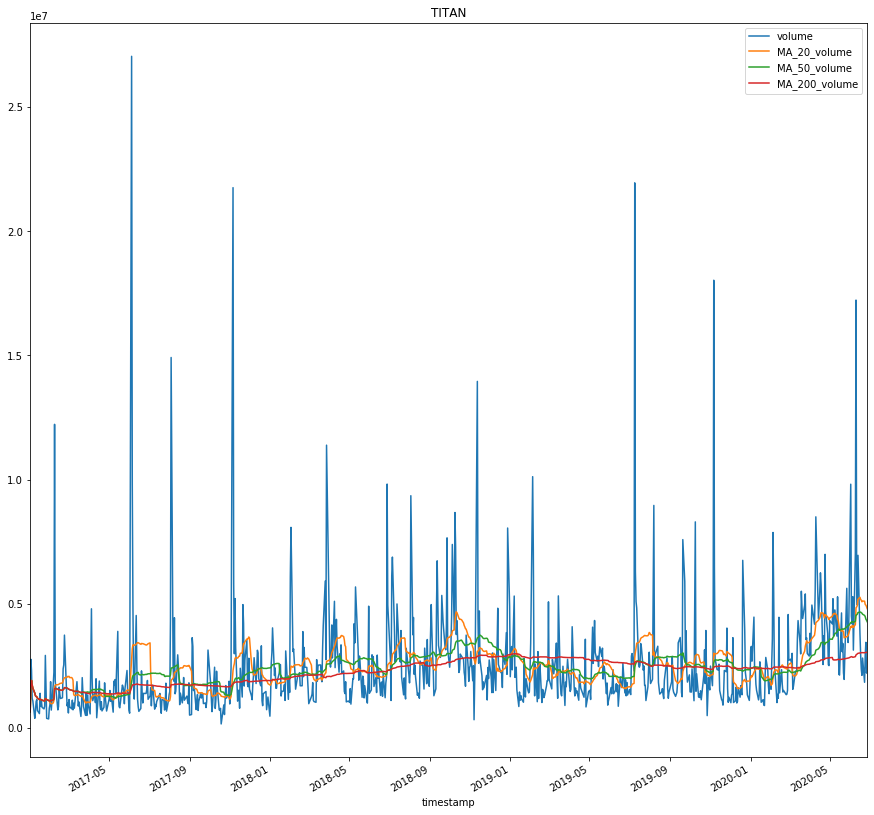

In [90]:
# Closing price and volume moving average for all consumer good companies
for i in consumer_goods:
    plot_moving_average(i.split('_')[0], pd.read_csv(i),'close',[20,50,200])
    plot_moving_average(i.split('_')[0], pd.read_csv(i),'volume',[20,50,200])

### Rough Work

In [18]:
change_df(pd.read_csv(consumer_goods[0]))['close'].rename(columns={'close':'asianpaints'})

timestamp
2017-01-02 00:00:00+05:30     905.10
2017-01-03 00:00:00+05:30     896.05
2017-01-04 00:00:00+05:30     906.70
2017-01-05 00:00:00+05:30     916.20
2017-01-06 00:00:00+05:30     930.65
                              ...   
2020-06-22 00:00:00+05:30    1652.00
2020-06-23 00:00:00+05:30    1689.00
2020-06-24 00:00:00+05:30    1747.20
2020-06-25 00:00:00+05:30    1692.00
2020-06-26 00:00:00+05:30    1693.00
Freq: D, Length: 1272, dtype: float64

In [65]:
concat_df

ASIANPAINT  BRITANNIA  EMAMILTD  HINDUNILVR
timestamp                                                             
2017-01-02 00:00:00+05:30      905.10    1445.00    488.00      825.10
2017-01-03 00:00:00+05:30      896.05    1437.52    517.50      828.00
2017-01-04 00:00:00+05:30      906.70    1428.00    519.50      823.40
2017-01-05 00:00:00+05:30      916.20    1435.00    524.50      832.00
2017-01-06 00:00:00+05:30      930.65    1455.00    515.00      837.15
...                               ...        ...       ...         ...
2020-06-22 00:00:00+05:30     1652.00    3427.00    203.95     2100.05
2020-06-23 00:00:00+05:30     1689.00    3477.00    224.85     2157.80
2020-06-24 00:00:00+05:30     1747.20    3440.00    219.00     2133.00
2020-06-25 00:00:00+05:30     1692.00    3440.45    223.05     2156.50
2020-06-26 00:00:00+05:30     1693.00    3454.00    222.00     2151.65

[1272 rows x 4 columns]

In [66]:
concat_df.iloc[1] = concat_df.iloc[1]/concat_df.iloc[0]

In [67]:
concat_df

ASIANPAINT    BRITANNIA    EMAMILTD   HINDUNILVR
timestamp                                                                   
2017-01-02 00:00:00+05:30   905.100000  1445.000000  488.000000   825.100000
2017-01-03 00:00:00+05:30     0.990001     0.994824    1.060451     1.003515
2017-01-04 00:00:00+05:30   906.700000  1428.000000  519.500000   823.400000
2017-01-05 00:00:00+05:30   916.200000  1435.000000  524.500000   832.000000
2017-01-06 00:00:00+05:30   930.650000  1455.000000  515.000000   837.150000
...                                ...          ...         ...          ...
2020-06-22 00:00:00+05:30  1652.000000  3427.000000  203.950000  2100.050000
2020-06-23 00:00:00+05:30  1689.000000  3477.000000  224.850000  2157.800000
2020-06-24 00:00:00+05:30  1747.200000  3440.000000  219.000000  2133.000000
2020-06-25 00:00:00+05:30  1692.000000  3440.450000  223.050000  2156.500000
2020-06-26 00:00:00+05:30  1693.000000  3454.000000  222.000000  2151.650000

[1272 rows x 4 columns]

In [78]:
change_df(pd.read_csv(consumer_goods[0]), '1D')['close'].dropna()

timestamp
2017-01-02 00:00:00+05:30     905.10
2017-01-03 00:00:00+05:30     896.05
2017-01-04 00:00:00+05:30     906.70
2017-01-05 00:00:00+05:30     916.20
2017-01-06 00:00:00+05:30     930.65
                              ...   
2020-06-22 00:00:00+05:30    1652.00
2020-06-23 00:00:00+05:30    1689.00
2020-06-24 00:00:00+05:30    1747.20
2020-06-25 00:00:00+05:30    1692.00
2020-06-26 00:00:00+05:30    1693.00
Name: close, Length: 860, dtype: float64

In [63]:
concat_df = pd.concat([change_df(pd.read_csv(consumer_goods[0]))['close'], change_df(pd.read_csv(consumer_goods[1]))['close'], change_df(pd.read_csv(consumer_goods[2]))['close'], change_df(pd.read_csv(consumer_goods[3]))['close']], axis=1)

In [64]:
concat_df.columns = ['ASIANPAINT','BRITANNIA','EMAMILTD','HINDUNILVR']

In [61]:
concat_df

ASIANPAINT  BRITANNIA  EMAMILTD  HINDUNILVR
timestamp                                                             
2017-01-02 00:00:00+05:30        1.00       1.00      1.00        1.00
2017-01-03 00:00:00+05:30      896.05    1437.52    517.50      828.00
2017-01-04 00:00:00+05:30      906.70    1428.00    519.50      823.40
2017-01-05 00:00:00+05:30      916.20    1435.00    524.50      832.00
2017-01-06 00:00:00+05:30      930.65    1455.00    515.00      837.15
...                               ...        ...       ...         ...
2020-06-22 00:00:00+05:30     1652.00    3427.00    203.95     2100.05
2020-06-23 00:00:00+05:30     1689.00    3477.00    224.85     2157.80
2020-06-24 00:00:00+05:30     1747.20    3440.00    219.00     2133.00
2020-06-25 00:00:00+05:30     1692.00    3440.45    223.05     2156.50
2020-06-26 00:00:00+05:30     1693.00    3454.00    222.00     2151.65

[1272 rows x 4 columns]

<Figure size 432x288 with 0 Axes>

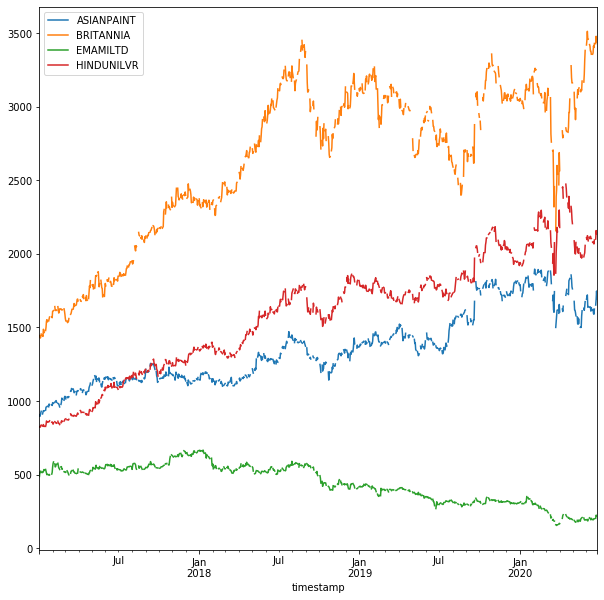

In [41]:
plt.figure()
concat_df.plot(figsize=(10,10))

/Users/pranav/anaconda3/envs/djangoenv/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/Users/pranav/anaconda3/envs/djangoenv/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/Users/pranav/anaconda3/envs/djangoenv/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/Users/pranav/anaconda3/envs/djangoenv/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



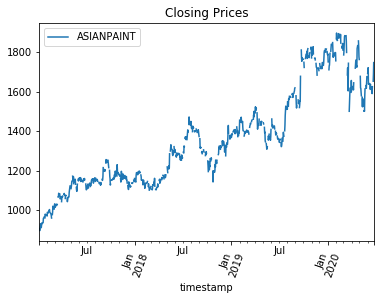

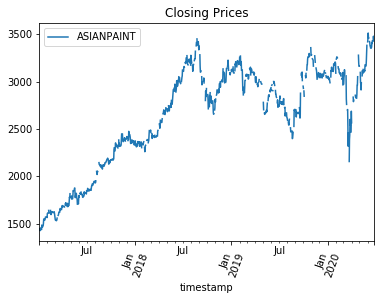

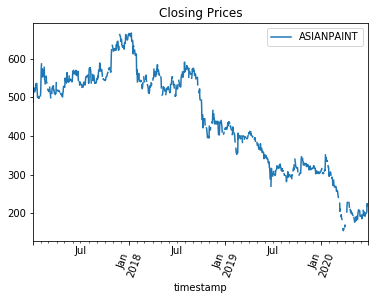

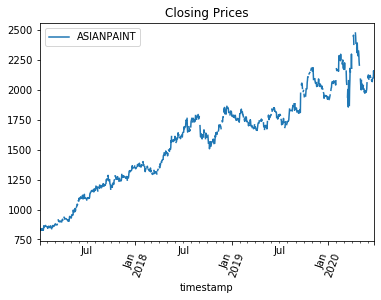

In [35]:
for i, col in enumerate(concat_df.columns):
    plt.figure()
    concat_df[col].plot()
    plt.title('Closing Prices')
    plt.xticks(rotation=70)
    plt.legend(concat_df.columns)

In [ ]:
fig.show()

In [11]:
df = pd.read_csv(consumer_goods[0])

In [ ]:
df.head()

In [12]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
df['timestamp'][:100]

In [ ]:
len(df)

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['timestamp'][321359-1000:321359],
                open=df['open'][321359-1000:321359],
                high=df['high'][321359-1000:321359],
                low=df['low'][321359-1000:321359],
                close=df['close'][321359-1000:321359])])

In [ ]:
pd.Grouper(key='time',freq='5T')

In [ ]:
ohlc_dict = {                                                                                                             
'Open':'first',                                                                                                    
'High':'max',                                                                                                       
'Low':'min',                                                                                                        
'Close': 'last',                                                                                                    
'Volume': 'sum'
}


In [ ]:
df.set_index(pd.to_datetime(df['timestamp']))

In [ ]:
newdf = df.dropna()

In [ ]:
newdf.resample('5T', how=ohlc_dict, closed='left', label='left')

In [ ]:
df.groupby(dr5minute.asof)

In [ ]:
df.groupby(pd.TimeGrouper('5Min')).agg({
                                        "OPEN":  "first",
                                        "HIGH":  "max",
                                        "LOW":   "min",
                                        "CLOSE": "last",
                                        "VOLUME": "sum"
                                    })

In [ ]:
# Grouping based on time-frequency
# Here we are grouping data every 5 mins
df_f = df.groupby(['ticker', pd.Grouper(key='time', freq='5T')])\
         .agg(open=pd.NamedAgg(column='price', aggfunc='first'), 
              close=pd.NamedAgg(column='price', aggfunc='last'), 
              high=pd.NamedAgg(column='price', aggfunc='max'), 
              low=pd.NamedAgg(column='price', aggfunc='min'))\
         .reset_index()

In [ ]:
df.groupby(pd.Grouper(key='timestamp', freq='5T'))\
         .agg(open=pd.NamedAgg(column='price', aggfunc='first'), 
              close=pd.NamedAgg(column='price', aggfunc='last'), 
              high=pd.NamedAgg(column='price', aggfunc='max'), 
              low=pd.NamedAgg(column='price', aggfunc='min'))

In [ ]:
df = df.set_index(pd.DatetimeIndex(df['timestamp']))
data = df.resample('1d').agg(
    OrderedDict([
        ('open', 'first'),
        ('high', 'max'),
        ('low', 'min'),
        ('close', 'last'),
        ('volume', 'sum'),
    ])
)


In [ ]:
df

In [ ]:
df1d = change_df(df)

In [ ]:
len(df1d)

In [ ]:
df1d.index[:200]

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df1d.index,
                open=df1d['open'],
                high=df1d['high'],
                low=df1d['low'],
                close=df1d['close'])])

In [ ]:
fig.show()

In [ ]:
plot_candlestick(df,'15T')

In [ ]:
df_h = change_df(df,'60T')

In [ ]:
df[350:400]

In [9]:
df = pd.read_csv(consumer_goods[0])

In [10]:
df.head()

timestamp    open    high     low  close    volume
0  2017-01-02 09:15:00+05:30  892.55  893.10  891.05  893.0    7599.0
1  2017-01-02 09:16:00+05:30  893.95  894.85  893.20  893.8    3384.0
2  2017-01-02 09:17:00+05:30  893.40  893.95  893.00  893.2    2638.0
3  2017-01-02 09:18:00+05:30  892.25  893.20  891.75  892.5  103839.0
4  2017-01-02 09:19:00+05:30  893.00  893.65  892.70  893.5    1696.0

In [13]:
df.rolling(window=5).mean()['close']

0             NaN
1             NaN
2             NaN
3             NaN
4          893.20
           ...   
321355    1688.61
321356    1688.11
321357    1687.65
321358    1688.86
321359    1689.90
Name: close, Length: 321360, dtype: float64

In [14]:
len(df)

321360

<Figure size 432x288 with 0 Axes>

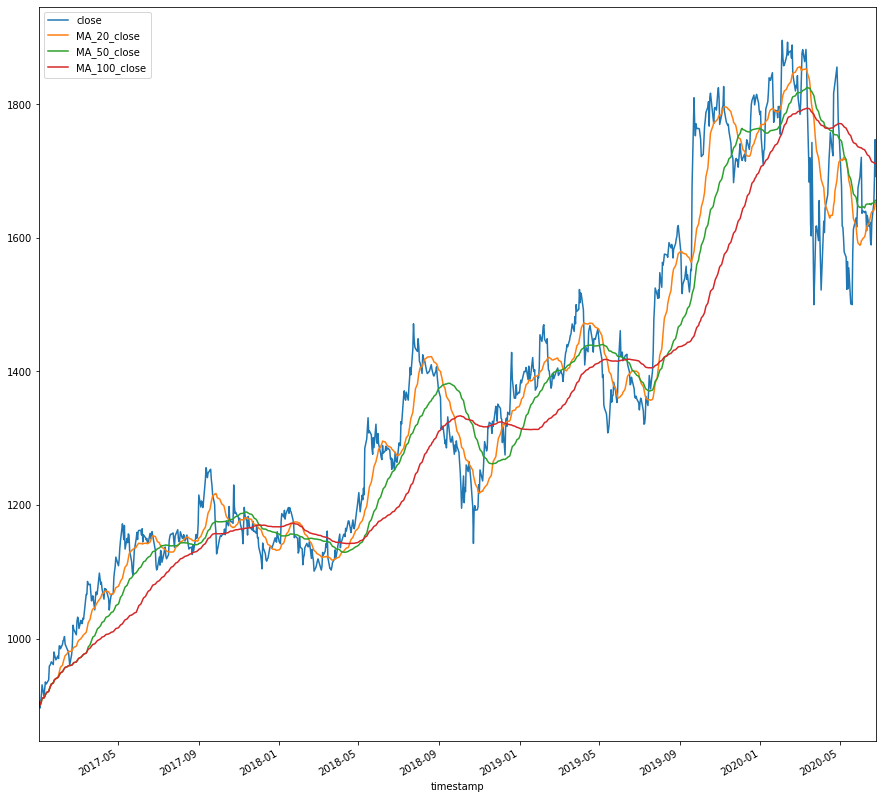

In [70]:
plot_moving_average(df,'close',[20,50,100])

<Figure size 432x288 with 0 Axes>

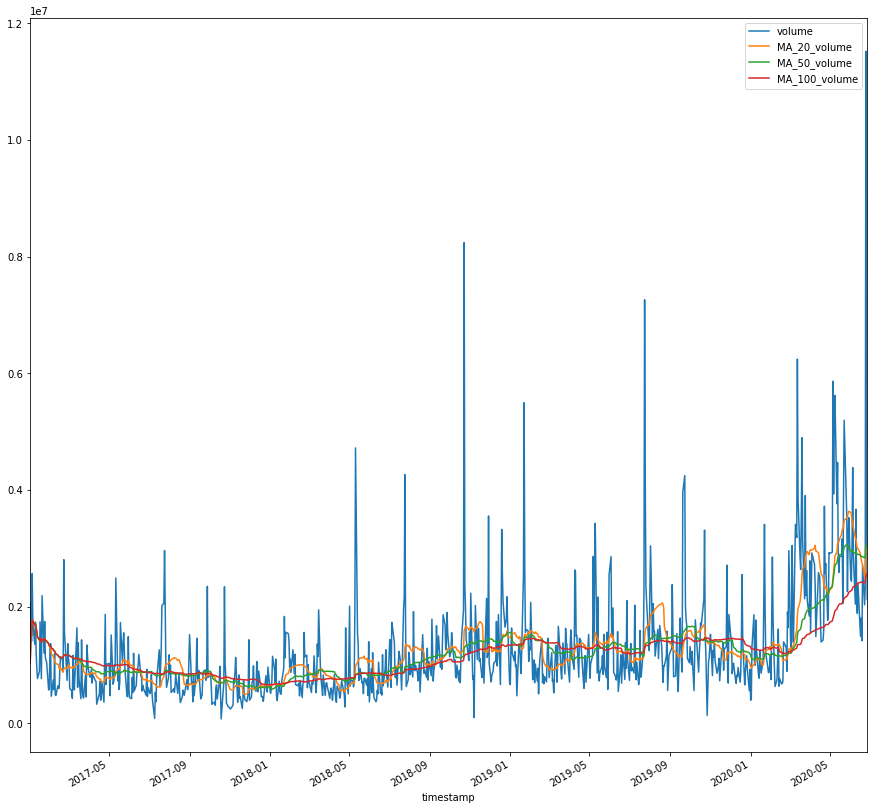

In [71]:
plot_moving_average(df,'volume',[20,50,100])